170498071/170498071 [==============================] - 11s 0us/step


Accuracy: 0.76


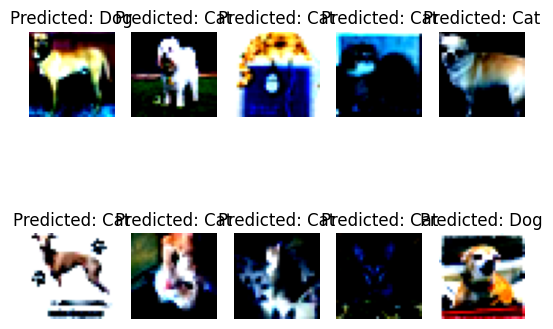

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from tensorflow.keras.datasets import cifar10

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Consider only 'cat' (class 3) and 'dog' (class 5) images
cat_indices = np.where((y_train == 3) | (y_train == 5))[0]
dog_indices = np.where((y_test == 3) | (y_test == 5))[0]

cat_images = x_train[cat_indices]
dog_images = x_test[dog_indices]

# Create labels for the dataset (0 for cat, 1 for dog)
cat_labels = np.zeros(len(cat_images))
dog_labels = np.ones(len(dog_images))

# Concatenate cat and dog data
X = np.concatenate((cat_images, dog_images), axis=0)
y = np.concatenate((cat_labels, dog_labels), axis=0)

# Flatten the images to use them as feature vectors
X = X.reshape(X.shape[0], -1)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create an SVM classifier
svm_classifier = SVC(kernel='linear', C=1.0, random_state=42)

# Train the classifier on the training data
svm_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_classifier.predict(X_test)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Optionally, you can visualize a few predictions
sample_indices = np.random.choice(range(len(y_test)), 10, replace=False)
sample_images = X_test[sample_indices].reshape(-1, 32, 32, 3)
sample_predictions = svm_classifier.predict(X_test[sample_indices])

# Visualize sample images and predictions
for i in range(len(sample_images)):
    plt.subplot(2, 5, i + 1)
    plt.imshow(sample_images[i])
    plt.title(f"Predicted: {'Dog' if sample_predictions[i] == 1 else 'Cat'}")
    plt.axis('off')

plt.show()


In [2]:
!pip install tensorflow